In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
telco_base_data.describe()
## To se the Statics of the data and those are showns which are in the number
## and basically the tenure is the number of the months and in our data the 75% data has tenure less than the 55 months
##

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count of TARGET Varaible per category')

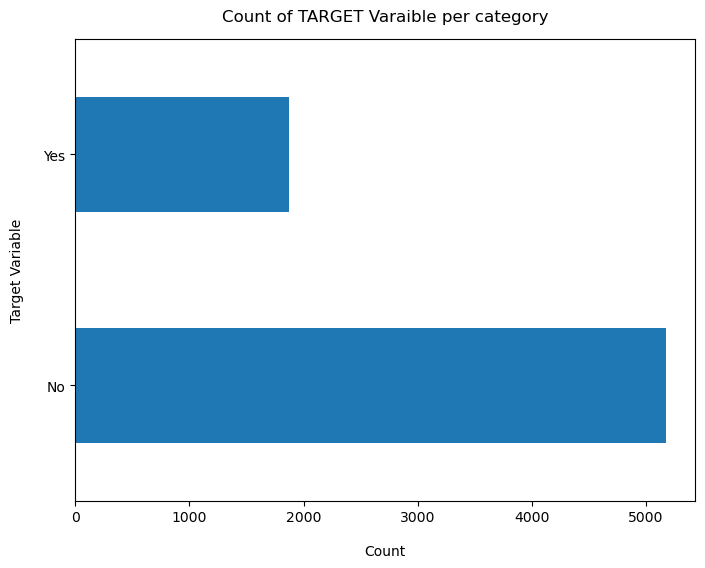

In [11]:
telco_base_data['Churn'].value_counts().plot(kind = 'barh', figsize =(8,6))
## barh plot is the horizontal bar plot 
plt.xlabel('Count', labelpad = 14)
plt.ylabel('Target Variable', labelpad =14)
plt.title('Count of TARGET Varaible per category', y = 1.02)

In [12]:
## for counting the value 

In [13]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [16]:
## so the above output shows that 73.46% are not churn and 26.53% are churn

In [17]:
## And Data above is highlt imbalanced, ratio = 73:27 (why data is imbalanced means the ratio of both the class should nearer to each ther like 50:50 or 45:55 like that and the cons of the immbalanced data is that model is gonna be a overfiitng (in details lets say that the churn customers has more charaterstics that the no churn custoomer so the model canot br the efficient)
## So we analyse the data with other features while taking the target values saperately to get some insights.

In [18]:
## to deal with the imbalaanced dataset there are two techniques one is upsampling and other is downsampling
## what is the upsampling do is we have to create the synthetically which mean lets say i have 2000 record of the churner so what is do is create a total 5000 record out of it and to create the 5000 record i just copy paste it from my chrner data nad copy paste it and rename some of the features value
## for down sampling what we do is the lower class(with less record) we just take the same number from the upper class so what will happen is that lets say our lower class is with 2000 data and the upper class is with 5000 data so we take only 2000 data from the 5000 data and taring the model accordingly so the modeel is balanced

In [19]:
#consise summary of the dataframe, as we have too many columns, we are using the verbose =True mode 
telco_base_data.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/Users/imdadhusain/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


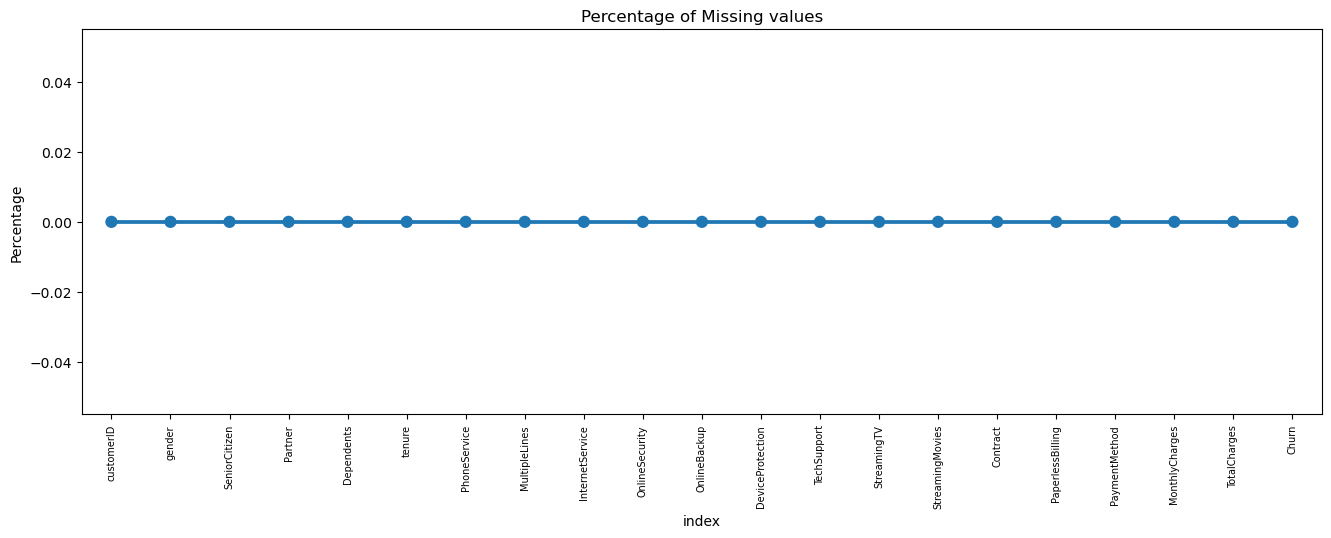

In [21]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize =7)
plt.title('Percentage of Missing values')
plt.ylabel('Percentage')
plt.show()

In [29]:
# now convert the object type of the data to the float or to its appropiate type in our case where the values of the monthly charges are of object types now we have to convert it to the float type and this method is called the data cleaning

In [32]:
telco_data = telco_base_data.copy()

In [33]:
# now we are converting it into the numeric value of the colunm of the total charge
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors ='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
## to find the data location which are missing 
## Treatment of the missing values
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [36]:
# now the Percentage of the missing values are very with respect to the whole data set that is why we are dropping those record
telco_data.dropna(how = 'any', inplace = True)

In [38]:
# dividing the customers based on the tenures E.G for tenures <12 months: assign a tenure group if 1-12, for tenure between 1 to 2 yrs, tenure group 13- 24 yrs so on
# we are doing these because if we divide them in the group that can be easy for us to analysis

In [39]:
print(telco_data['tenure'].max())

72


In [43]:
## group them in the bins of the 12 months tenure
labels =["{0} - {1}".format(i,i+11)for i in range(1, 72, 12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right =False, labels= labels)

In [45]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [47]:
# Now to Drop Some columns which are not required
# the columns which we are dropping are Customer ID And Tenure, tenures is because tenure-group 

In [48]:
telco_data.drop(columns =['customerID', 'tenure'], axis = 1, inplace = True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

Univariate Analysis

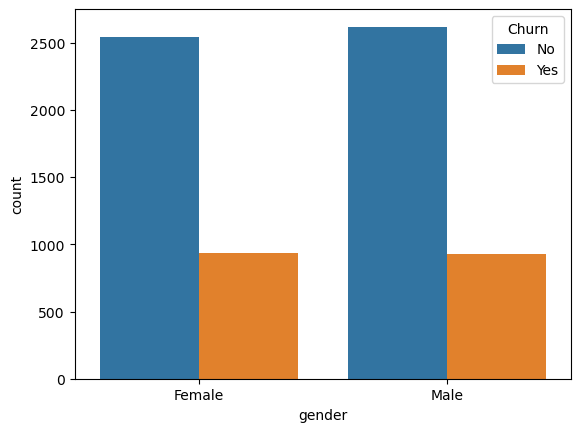

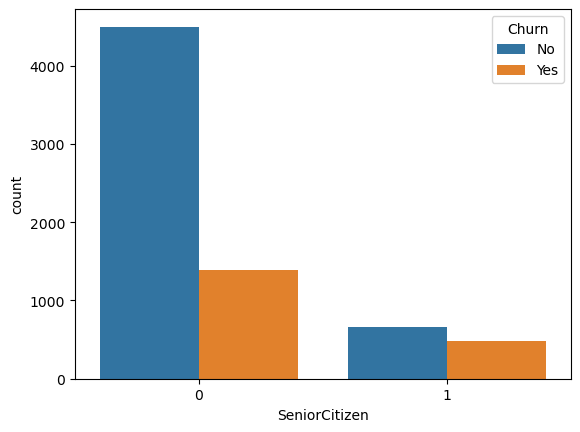

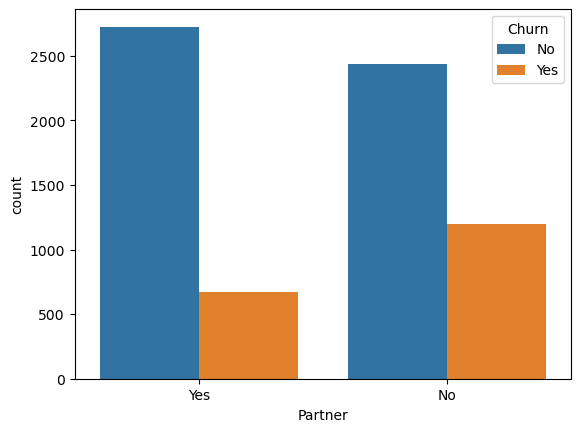

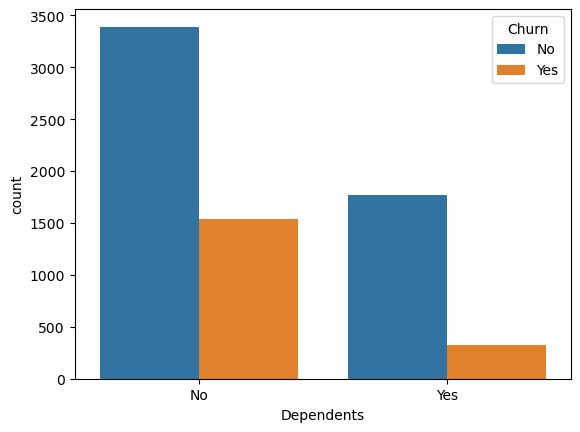

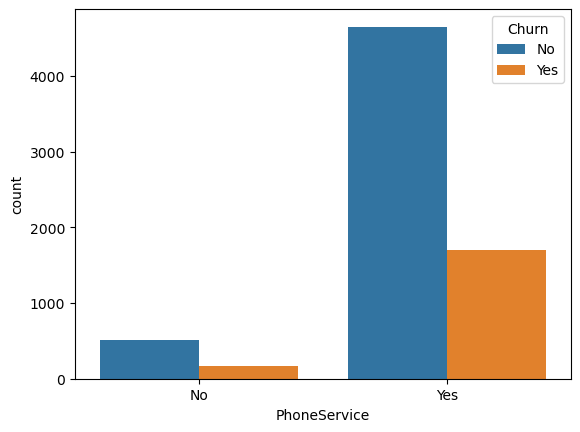

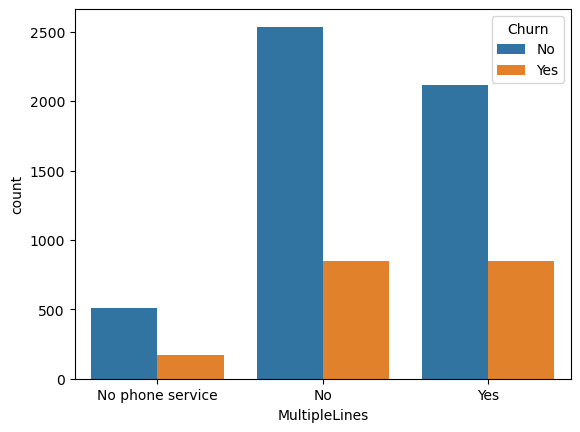

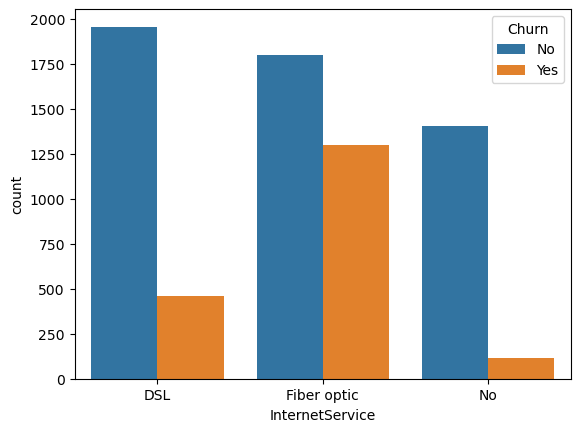

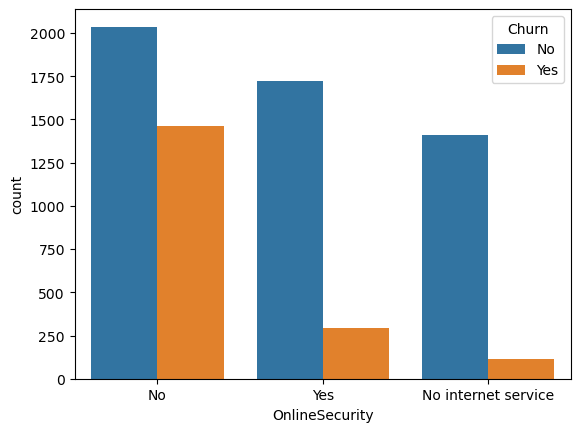

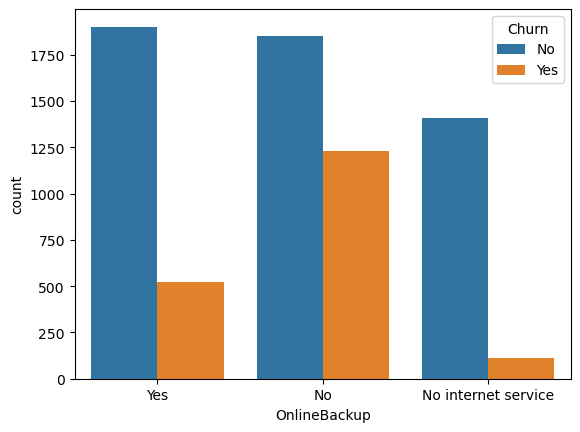

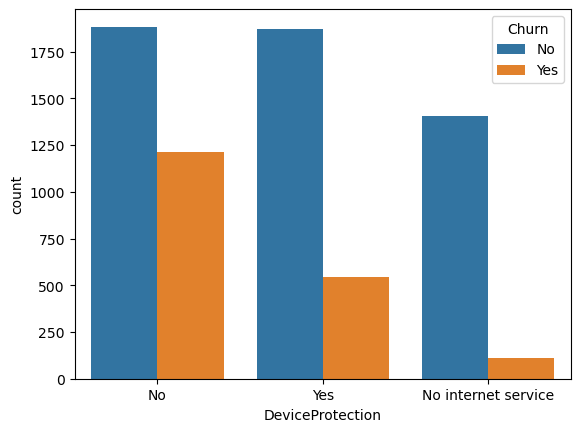

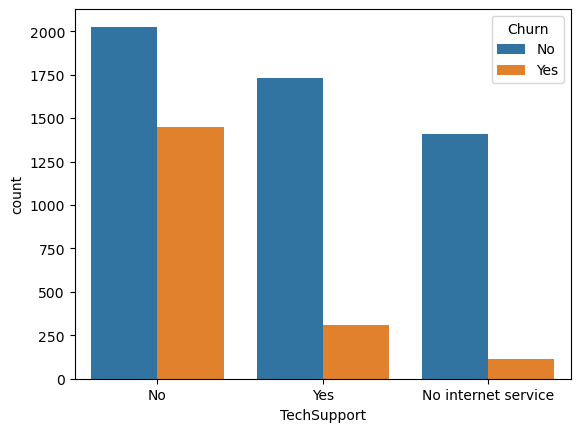

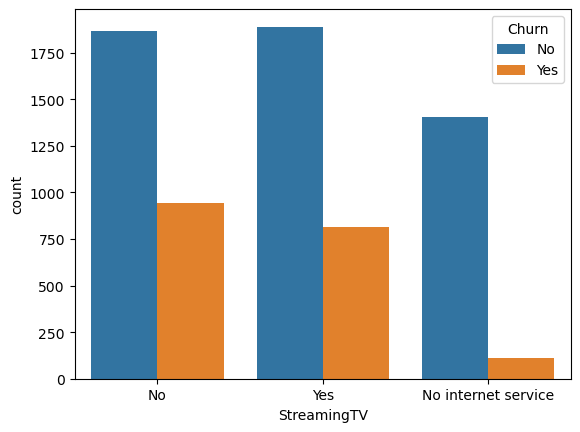

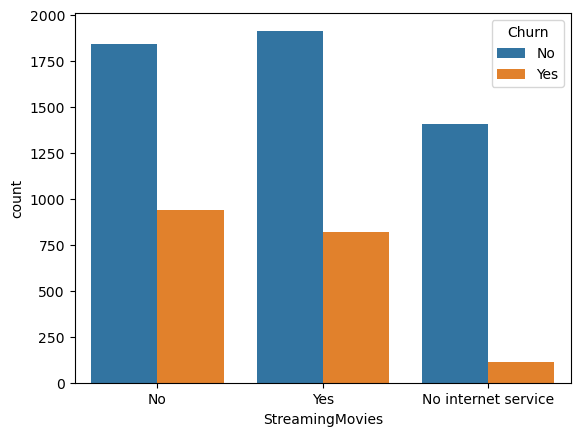

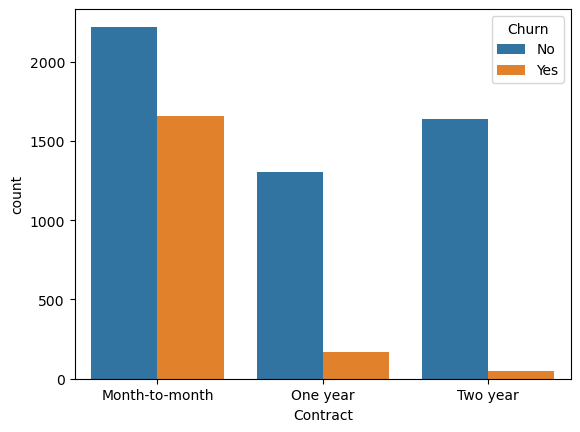

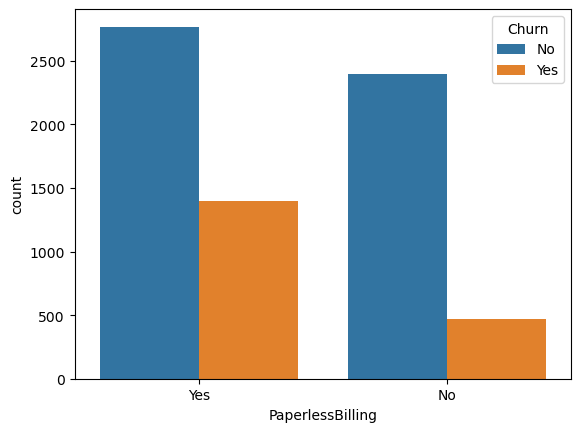

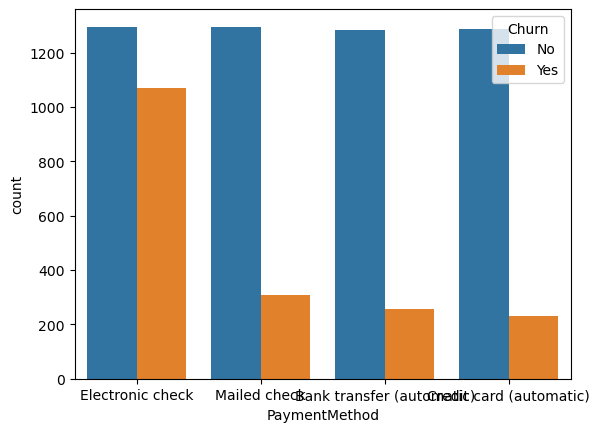

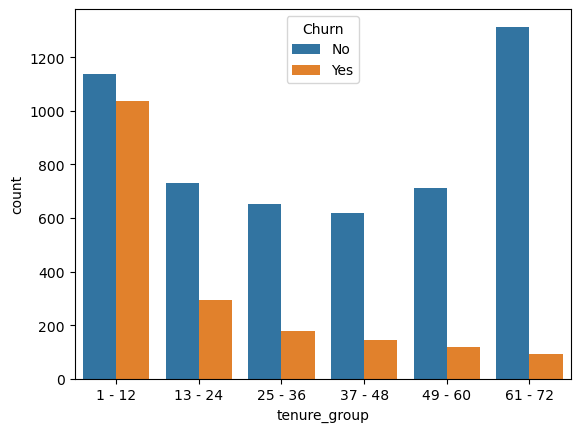

In [51]:
for i, predicator in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data= telco_data, x= predicator, hue='Churn')

In [52]:
## convert the target variable 'Churn' in a binary numeric Variable i.e yes=1 ; no =0 

In [53]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [54]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [55]:
# Now convert all the categorical varibale into the dummy variable 

In [56]:
telco_data_dummies = pd.get_dummies(telco_data)

In [57]:
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [58]:
#Relationship between MonthlyCharges and TotalCharges
# here we are finding the relationship between those two variable because i per my guess thoes two variable are only the float in whole telco_data_dummies

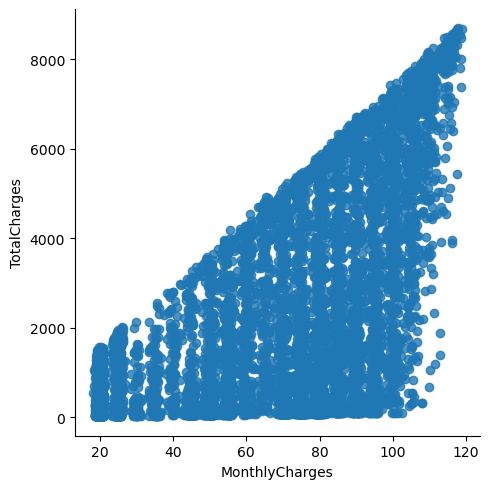

In [59]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y= 'TotalCharges', fit_reg = False)

In [60]:
#total charges increases as the monthly charges increases 

In [61]:
# now the realtionship of the churn as the monthly charges 

Text(0.5, 1.0, 'Monthly Charges by churn')

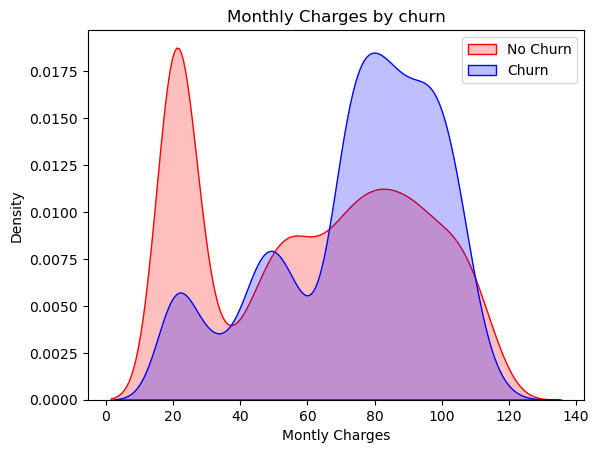

In [67]:
Mth =sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==0)],color = "Red",shade =True)
Mth =sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)], ax = Mth,color = "Blue",shade =True)
Mth.legend(["No Churn","Churn"],loc ='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Montly Charges')
Mth.set_title('Monthly Charges by churn')

In [68]:
# Insight : Churn is high when Monthly Charges are high as expected

In [69]:
# now the realtionship of the churn as the Total charges 

Text(0.5, 1.0, 'Total Charges by churn')

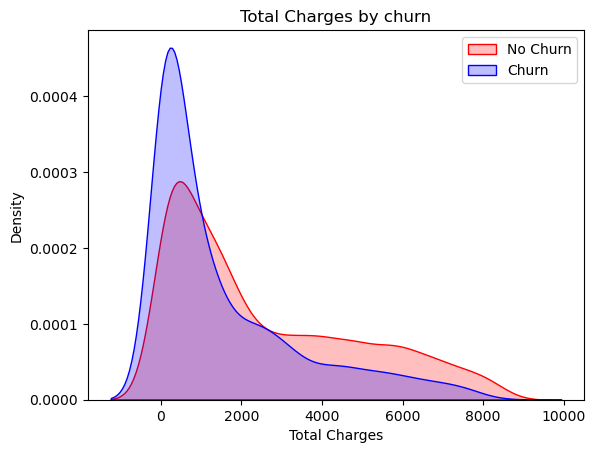

In [73]:
Tot =sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==0)],color = "Red",shade =True)
Tot =sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==1)], ax = Tot,color = "Blue",shade =True)
Tot.legend(["No Churn","Churn"],loc ='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by churn')

In [74]:
# Build a Corelation of all predicators with 'Churn'


<AxesSubplot:>

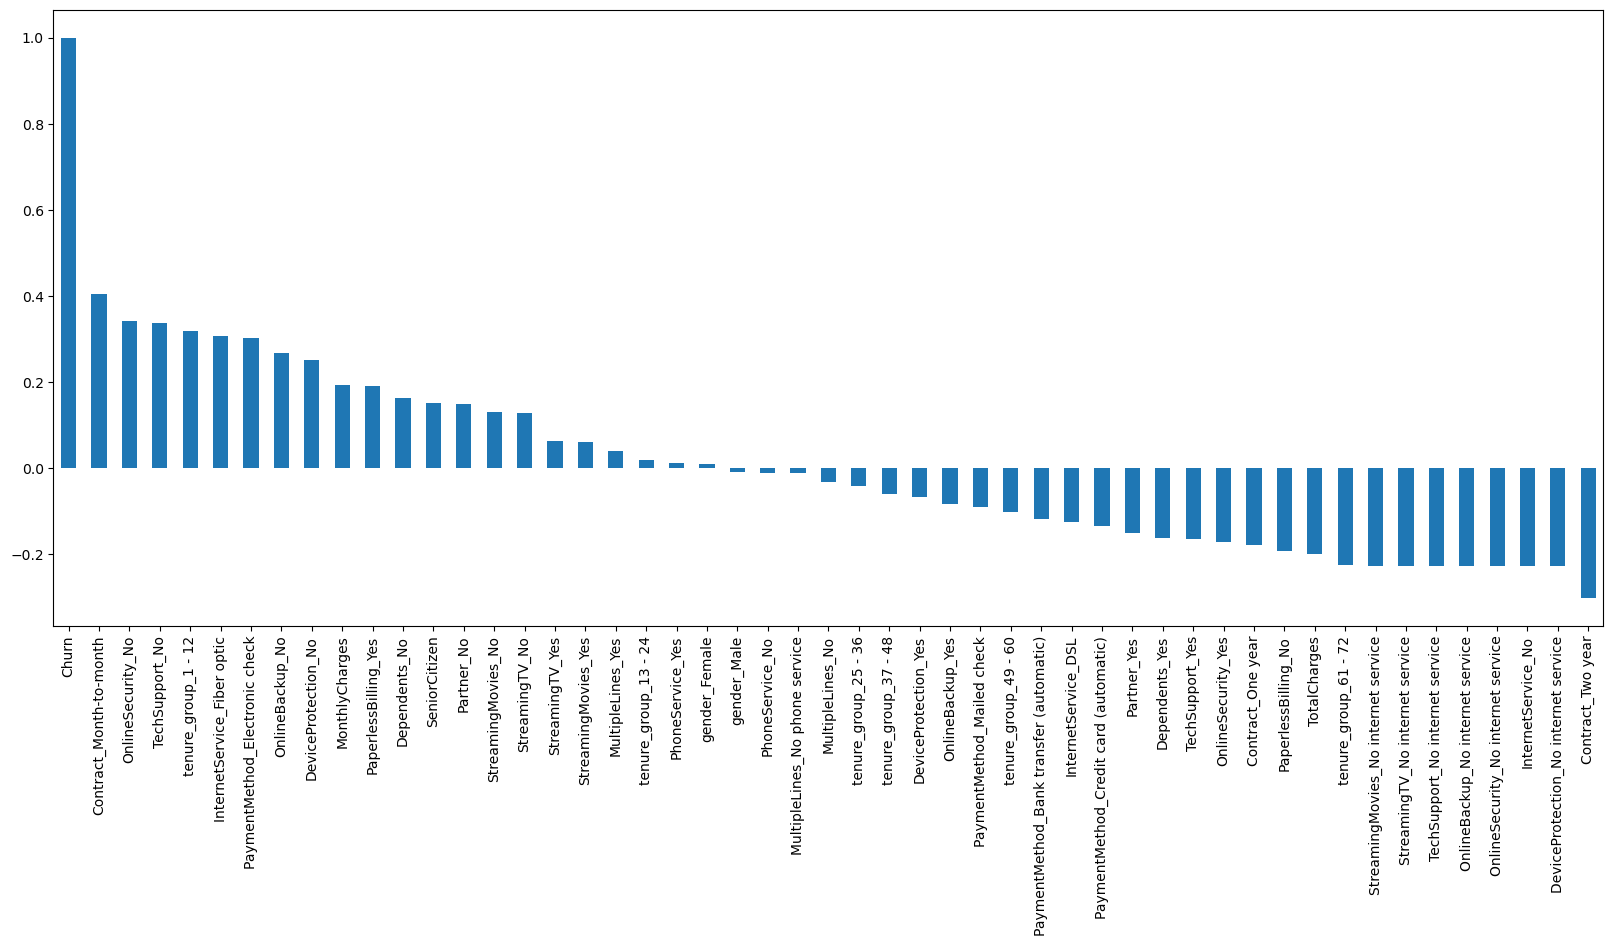

In [75]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending =False).plot(kind = 'bar')

In [76]:
#conclusion from the above is 
# HIGH Churn seen in case of Month to month contracts, no online Security, No tech Support, First year of subscription, Fiber optics Internet are the factor which are affecting the or the churner are high 
# LOW churn is seen in case of long term contracts, Subscription with the internet Service, 5+year of the tenure
# and the factor like gender, Avalibility of the phoneServices and #of multiple have almost no impact on churn 


In [77]:
#heatmap 

<AxesSubplot:>

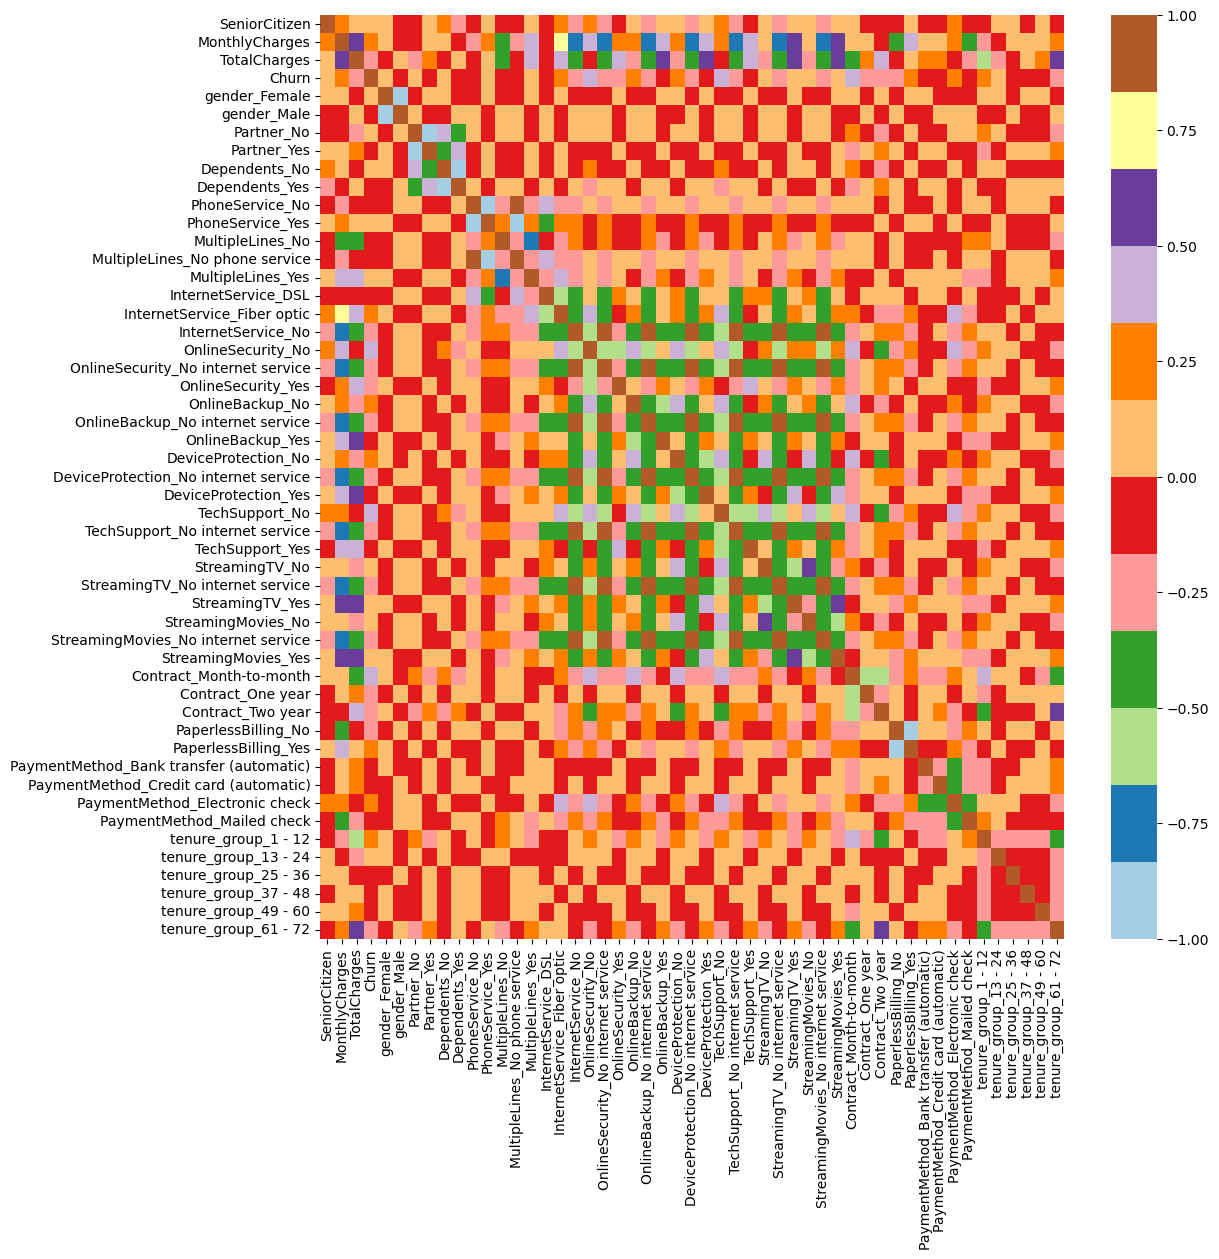

In [78]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap = "Paired")

Bivariate Analysis 

In [79]:
# now we are analysing on the two types of the data set
# one is chruner and another one is non churner

In [80]:
new_df1_target0 = telco_data.loc[telco_data["Churn"]==0]
new_df1_target1 = telco_data.loc[telco_data["Churn"]==1]

In [81]:
new_df1_target1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


In [82]:
new_df1_target1.shape

(1869, 20)

In [102]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

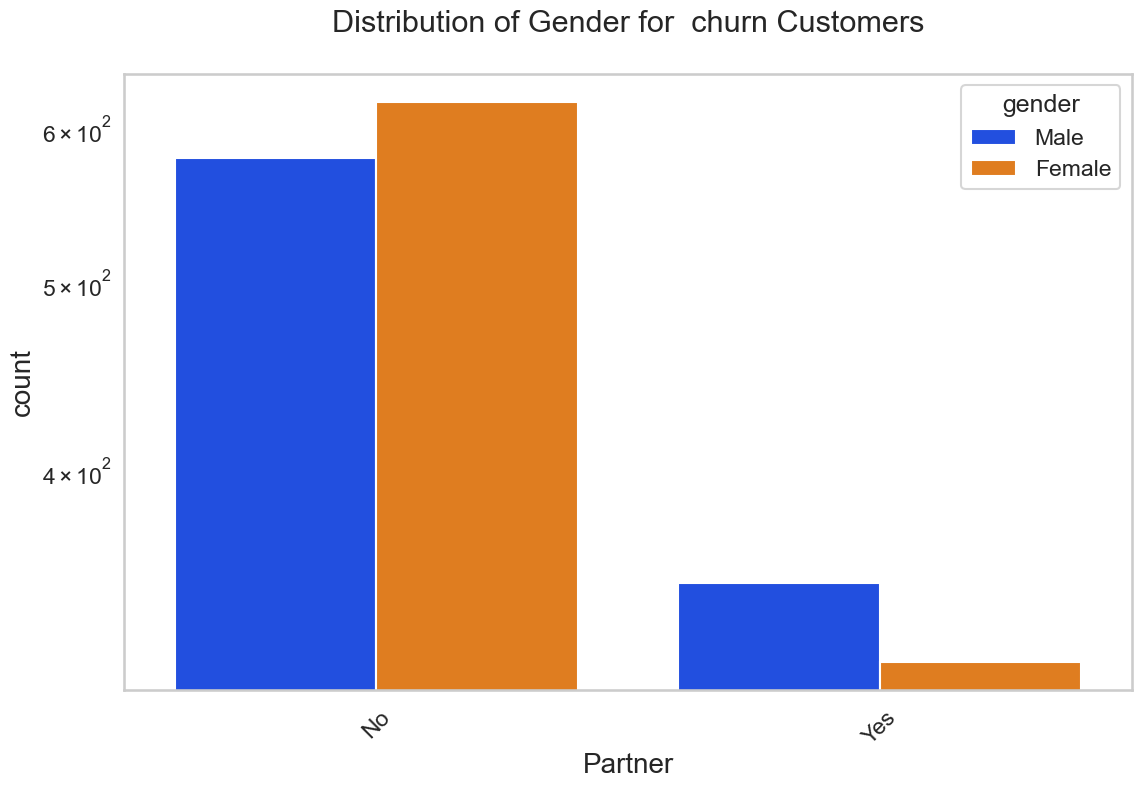

In [103]:
uniplot(new_df1_target1, col='Partner', title ='Distribution of Gender for Churn Customers', hue = 'gender')

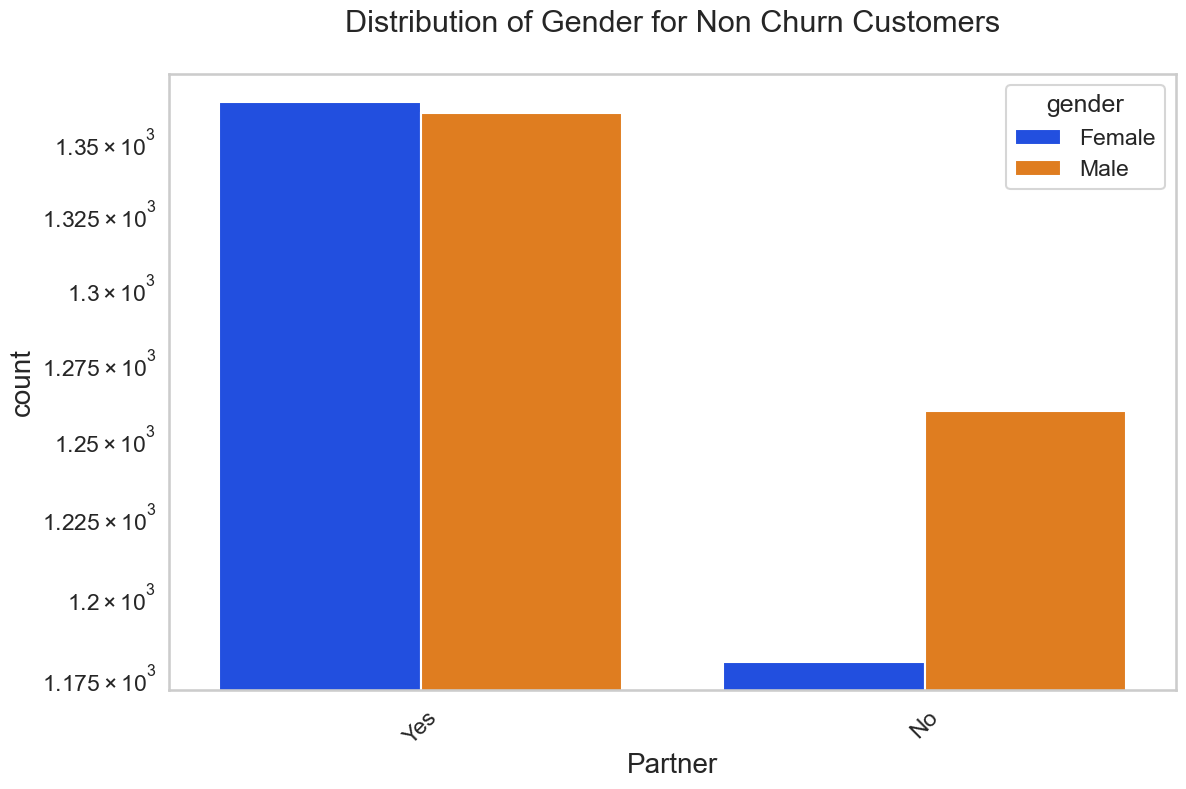

In [104]:
uniplot(new_df1_target0, col='Partner', title ='Distribution of Gender for Non Churn Customers', hue = 'gender')

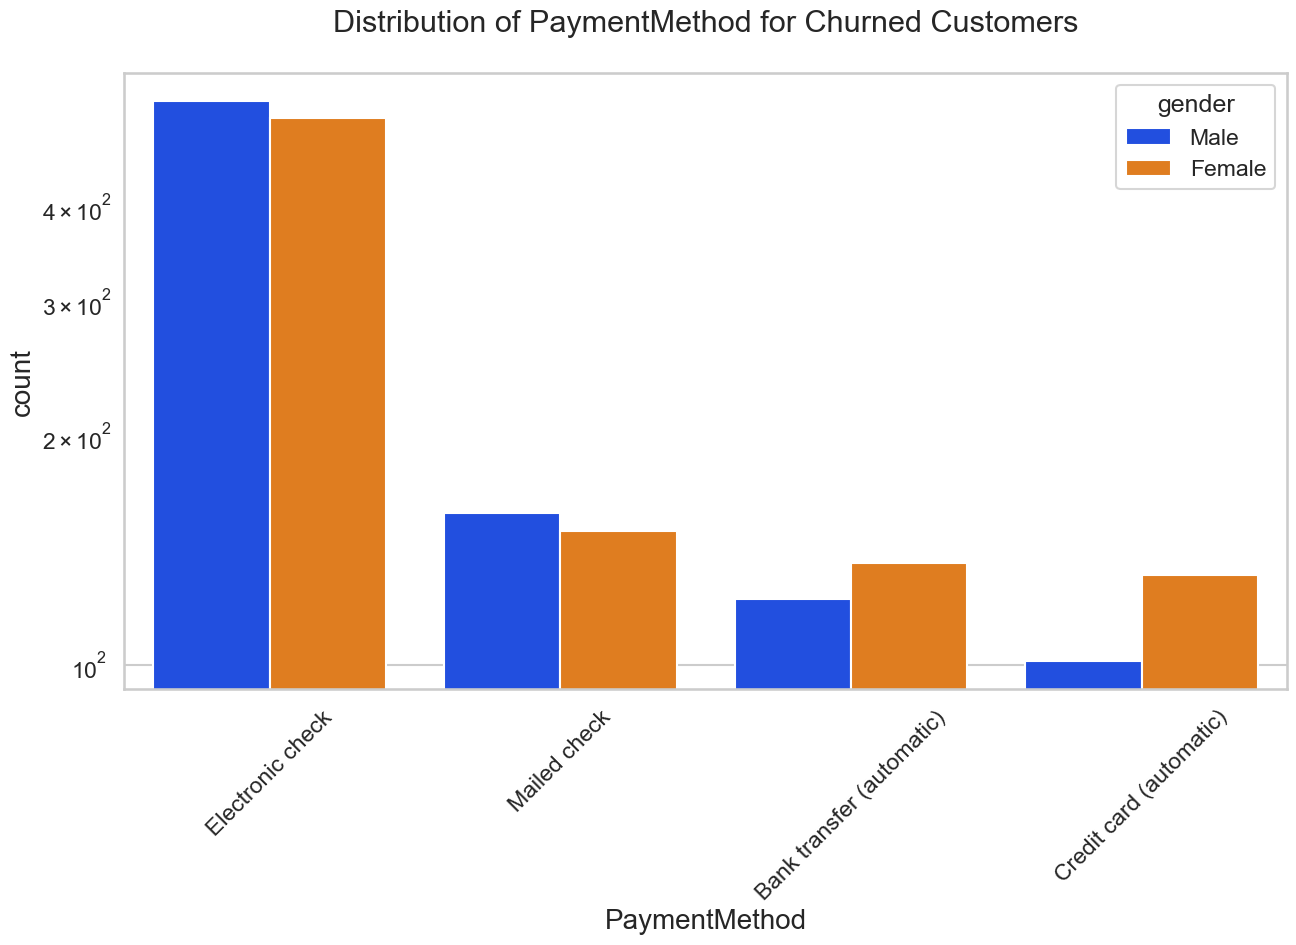

In [105]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

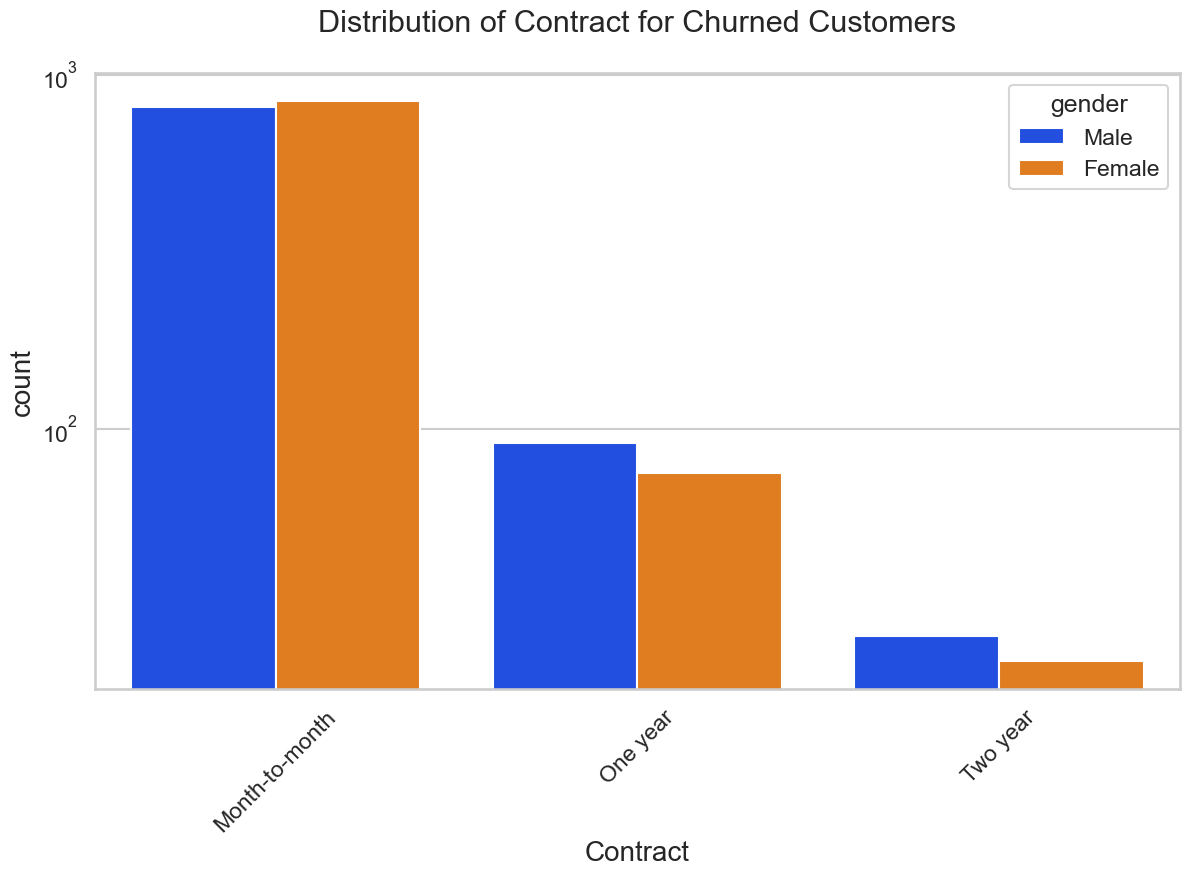

In [106]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

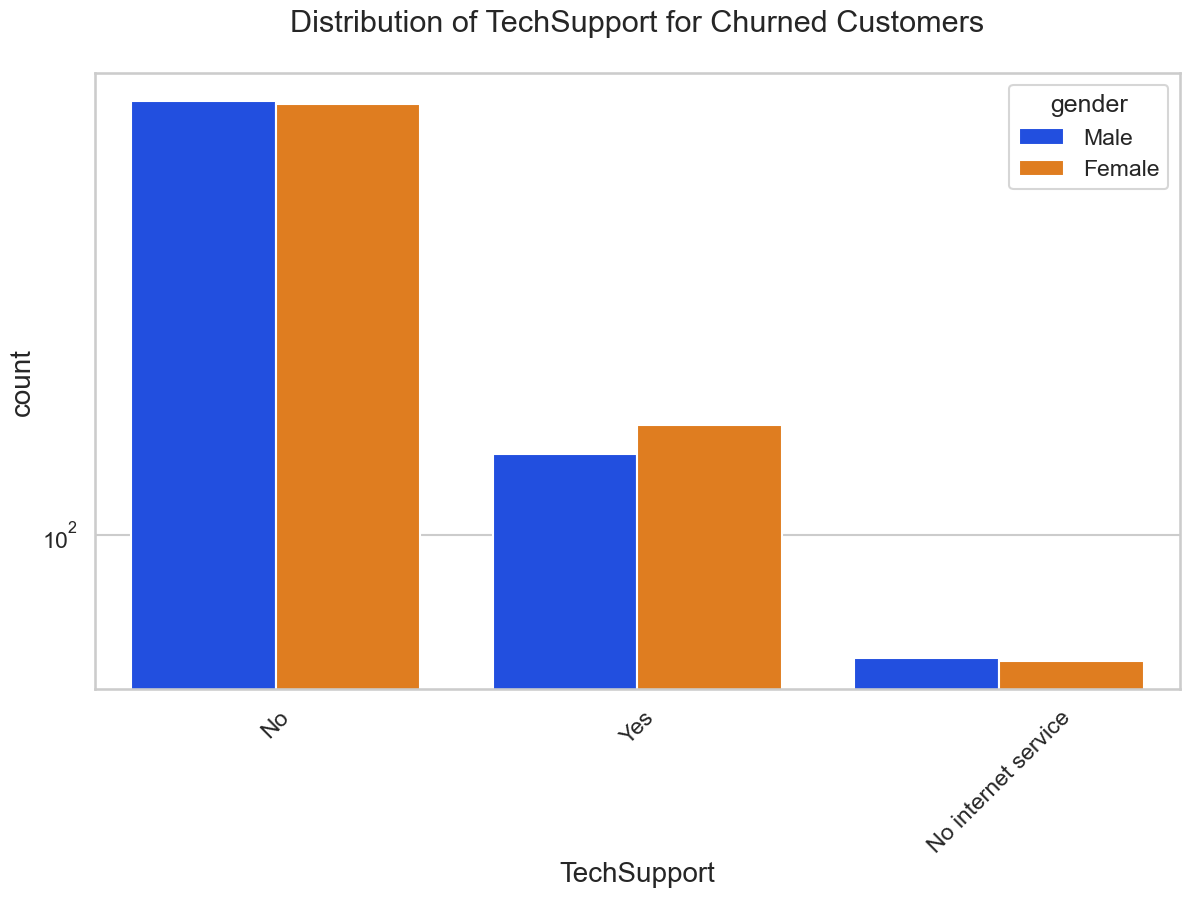

In [107]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

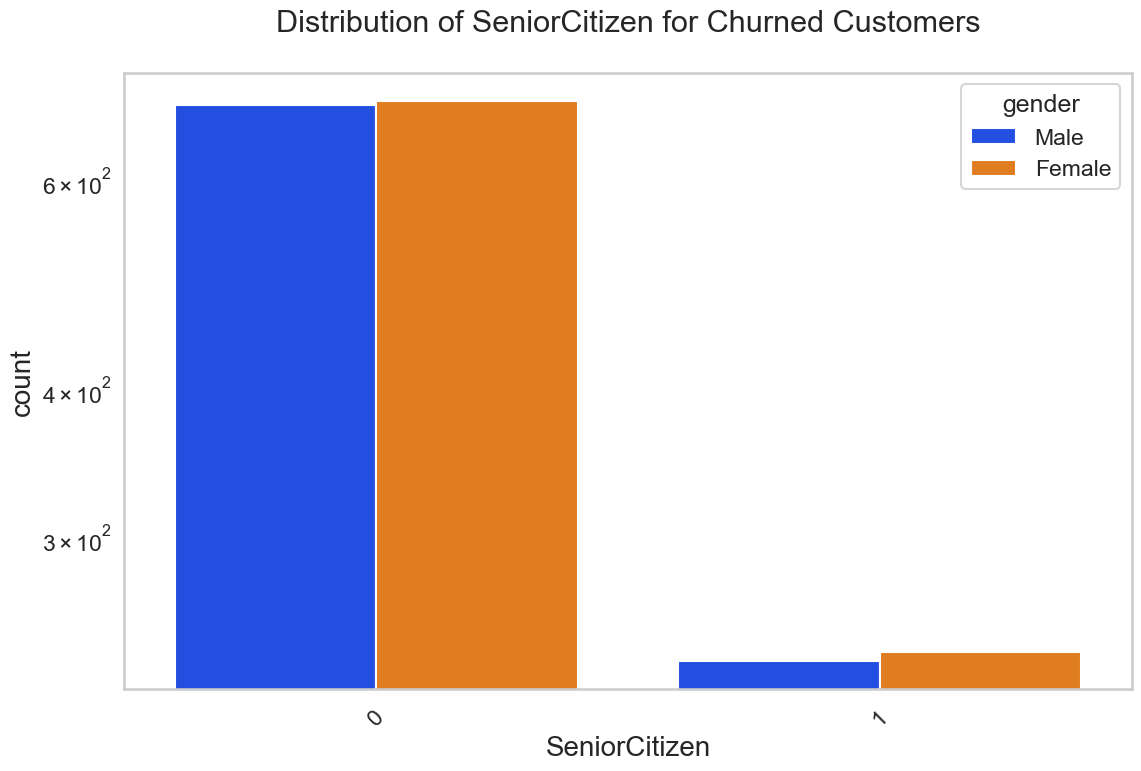

In [108]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

<h1>Conclusion</h1>

There are some quick inshights from the above problem or analysis

1: Electronic check medium are the highest churner
2: Contract Type - Monthly customers are more likely to churn because of no contarct terms, as they are free to go customers.
3: No online security No tech support Categories are high churners
4: Non Senior Citizen are high churner

In [109]:
telco_data_dummies.to_csv('tel_churn.csv')